In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [3]:
rawDS=pd.read_csv("train.csv")

In [4]:
rawDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Columns Information

- PassengerId - Contains the ID of the passenger
- Survived - 1=survived 0=died
- Pclass - A proxy for socio-economic status (1=Upper, 2=Middle, 3=Lower)
- Name - Name of the passenger
- Sex - Male or Female
- Age - Age of the passenger
- SibSp - Number of sibling and spouse
- Parch - Number of parent and children
- Ticket - Ticket number
- Fare - Fare price
- Cabin - Cabin number
- Embarked - port C = Cherbourg, Q = Queenstown, S = Southampton

### EDA Starts here

In [5]:
rawDS.shape
#we have some 891 rows of data which is decent for now.

(891, 12)

In [6]:
rawDS.info
#seems fine

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
# lets see if we have proper data or not.
# so first let see if we have any null data
rawDS.isnull().sum()
#MOTS_1: we have to take careof the Null values where we will do some trick

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
firstDS = rawDS
firstDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Our EDA starts here ===========================================================

<AxesSubplot:>

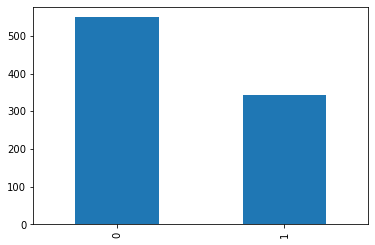

In [9]:
#lets check if we have balanced dataset or not.
firstDS.Survived.value_counts().plot(kind='bar')
#MOTS_2: seems like we have balanced dataset which indicates we have less survived sad but true :p

In [10]:
firstDS.Sex.value_counts(0)

male      577
female    314
Name: Sex, dtype: int64

In [11]:
# Replaceing female with 0 and male with 1
# firstDS.Sex=firstDS['Sex'].replace(['female'],'0')
# firstDS.Sex=firstDS['Sex'].replace(['male'],'1')

# After submittion-3 we are doing one-hot encoding for the sex to check the accuracy okie.
Sex = firstDS['Sex']
Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [12]:
Sex = pd.get_dummies(Sex)
Sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [13]:
# Lets check the age now, we know we have some zeros in age we need to check that
firstDS.Age.isnull().sum()

177

MOTS_3: (177*100)/891 = 19% of the data has null values \
we need to take care of null values which can be handled in many ways but we will look mainly two methods.\
- replace null with mean values
- apply any algorithm to find out the age

We will go by first one to solve and compare with second one alright.

In [14]:
#lets find out the mean of age
firstDS.Age.mean(0)

29.69911764705882

In [15]:
# replacing the null values to 29
firstDS.Age=firstDS['Age'].replace([np.NaN],'29')
firstDS.head()
# Now since we have replace the Age, lets move on...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Sibling and parents looks fine to me... these are just number, A future endavours will be to find out the family and check if all the members of the family has survived\
or not. Ticket number will also not give you much insite because these will be unique numbers.

lets talk about the fare now. \
fare seems okie but let verify few things....\
1. Is the Pclass = 1must have the higher fare because it is first class right?
2. First class of passenger must have majority of survival rate is that true?


In [16]:
firstClassData = firstDS.loc[firstDS['Pclass']==1]
print("First class fare mean is: ",firstClassData.Fare.mean())
secondClassData = firstDS.loc[firstDS['Pclass']==2]
print("Second class fare mean is: ", secondClassData.Fare.mean())
thirdClassData = firstDS.loc[firstDS['Pclass']==3]
print("Third class fare mean is: ",thirdClassData.Fare.mean())

First class fare mean is:  84.15468749999992
Second class fare mean is:  20.66218315217391
Third class fare mean is:  13.675550101832997


It seems like the first class fare is high and then second class and then third class. Which is correct.\
Now i want to know how many people survived with respect to class.

In [17]:
print(firstClassData.Survived.value_counts(1)*100)
print(secondClassData.Survived.value_counts(1)*100)
print(thirdClassData.Survived.value_counts(1)*100)

1    62.962963
0    37.037037
Name: Survived, dtype: float64
0    52.717391
1    47.282609
Name: Survived, dtype: float64
0    75.763747
1    24.236253
Name: Survived, dtype: float64


#### Changes for submittion-5
we are converting the Pclass to one-hot encoding because we wanted to check the accuracy further more.

**MOTS_4:** we can see that 63% of people from first class has survived the tradegy and 47% from second class and 24% from third class has survived the fall. \
which justify our observation. yayssss


In [18]:
# Converting numeric data to calagorical data
firstDS.Pclass=firstDS['Pclass'].replace([1],'UpperClass')
firstDS.Pclass=firstDS['Pclass'].replace([2],'MiddleClass')
firstDS.Pclass=firstDS['Pclass'].replace([3],'LowerClass')
firstDS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,LowerClass,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,UpperClass,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,LowerClass,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,UpperClass,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,LowerClass,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [19]:
# converting Pclass to one-hot encoding
Pclass = firstDS['Pclass']
Pclass = pd.get_dummies(Pclass)
Pclass.head()

,LowerClass,MiddleClass,UpperClass
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0


## IDEA: to implement later
I just came up with an idea is to compare the one-hot encoding and check accuracy right...?
let me explain. Our ultimate goal is to increase the accuracy right? so for that we have an age idea where we are doing some prediction for the age and we will check the accuracy. But now for Pclass which is a catogorical data and sex too. What are we going to do is first train a model with this simple data and then do one-hot encoding for the same Pclass and age and check the accuracy. Seems like fun right...?

In [20]:
# Lets check the cabin data.
A = firstDS.Cabin.isnull().sum() 
print("Null columns: ",A)
#seems like it contains null values

# lets check how many unique value it has.
B = len(firstDS.Cabin.unique())
print("Unique values: ",B)
# It has some 148 unique values

Null columns:  687
Unique values:  148


**Observation_1:** Cabin data is something like which is not giving you much of a thing. So we will drop this information, but before that lets see is these data missing randomly or something else.

In [21]:
thirdDS = firstDS[['Pclass','Cabin']].dropna()
print(thirdDS.shape)

(204, 2)


In [22]:
print(firstDS.Pclass.value_counts().sort_index())
print(thirdDS.Pclass.value_counts().sort_index())
print("-------------------------------------------------------")
print("We have cabin data for first class in ", (176/216)*100)

LowerClass     491
MiddleClass    184
UpperClass     216
Name: Pclass, dtype: int64
LowerClass      12
MiddleClass     16
UpperClass     176
Name: Pclass, dtype: int64
-------------------------------------------------------
We have cabin data for first class in  81.48148148148148


**MOTS_5:** Seems like we have cabin data mostly for the first class in 81% of chances, Now the question is shall we drop the column or not?
To answer this question we nneed to look at the data specifically this data is neither a catogorial data nor the relatable data. so we can drop this column but after proving that is not making any sense.

In [23]:
# Now lets check the Embarked data
print("Embarked has",firstDS.Embarked.isnull().sum(), "null data")

# Lets check the unique data in embarked columns
firstDS.Embarked.unique()

Embarked has 2 null data


array(['S', 'C', 'Q', nan], dtype=object)

**Observation_2:** It seems like this is a catagorical data and we need to do the one-hot encoding

In [24]:
Embarked = firstDS['Embarked']
Embarked

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [25]:
Embarked = pd.get_dummies(Embarked)
Embarked.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
firstDS.drop(["Embarked","Sex","Pclass"],axis=1,inplace =True)

In [27]:
firstDS.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN


In [28]:
firstDS = pd.concat([firstDS,Pclass,Sex,Embarked],axis=1)
firstDS.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LowerClass,MiddleClass,UpperClass,female,male,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",22,1,0,A/5 21171,7.2500,NaN,1,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38,1,0,PC 17599,71.2833,C85,0,0,1,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,1,0,113803,53.1000,C123,0,0,1,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35,0,0,373450,8.0500,NaN,1,0,0,0,1,0,0,1


In [29]:
# Now lets train our modal for that we need to make the train data and label too.
# We will have to drop the name and ticket and cabin so acctually MOTS_5 has been taken care here
X_train = firstDS[['PassengerId','Age','SibSp','Parch','Fare','LowerClass','MiddleClass','UpperClass','female','male','C','Q','S']]
X_train.head()

,PassengerId,Age,SibSp,Parch,Fare,LowerClass,MiddleClass,UpperClass,female,male,C,Q,S
0,1,22,1,0,7.2500,1,0,0,0,1,0,0,1
1,2,38,1,0,71.2833,0,0,1,1,0,1,0,0
2,3,26,0,0,7.9250,1,0,0,1,0,0,0,1
3,4,35,1,0,53.1000,0,0,1,1,0,0,0,1
4,5,35,0,0,8.0500,1,0,0,0,1,0,0,1


In [30]:
y_train = firstDS[['Survived']]
y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [35]:
# Now we have the base data lets train our model.
# model = RandomForestClassifier()
# Random forest did well but lets check other also.

# model =DecisionTreeClassifier()
# Decision tree classifier also did not perform well infact this is worst than Random forest.



ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Age

In [ ]:
model.fit(X_train,y_train)

In [ ]:
model.feature_importances_

In [ ]:
plt.figure(figsize=(10,5))
feat_importances=pd.Series(model.feature_importances_,index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

===================================================
===================================================

In [ ]:
# Till here we have made our modal work and it is trained now. We have features to tell us what was most important.
# Now it time to test our model and check the accuracy of the modal.

# Importing the test dataset
TRawDS = pd.read_csv('test.csv')
TRawDS.head()

In [ ]:
# Now we know the data columns information we will just go ahead and do the data conversion. Alright let's go...
firstDSTest = TRawDS
print(firstDSTest.shape)
firstDSTest.head()

In [ ]:
# Lets check if the dataset has any null values
firstDSTest.isnull().sum()

In [ ]:
# Replaceing female with 0 and male with 1
# firstDSTest.Sex=firstDSTest['Sex'].replace(['female'],'0')
# firstDSTest.Sex=firstDSTest['Sex'].replace(['male'],'1')
# firstDSTest.head()

# preparing test data for the submittion 4 and above
SexTest = firstDSTest['Sex']
SexTest = pd.get_dummies(SexTest)
SexTest

In [ ]:
firstDSTest.Age.mean()

In [ ]:
#Lets replace the null age to mean
firstDSTest.Age=firstDSTest['Age'].replace([np.NaN],'29')
firstDSTest.head()

In [ ]:
# Converting numeric data to calagorical data
firstDSTest.Pclass=firstDSTest['Pclass'].replace([1],'UpperClass')
firstDSTest.Pclass=firstDSTest['Pclass'].replace([2],'MiddleClass')
firstDSTest.Pclass=firstDSTest['Pclass'].replace([3],'LowerClass')
firstDSTest.head()

In [ ]:
# converting Pclass to one-hot encoding
PclassTest = firstDSTest['Pclass']
PclassTest = pd.get_dummies(PclassTest)
PclassTest.head()

In [ ]:
# lets convert Embarked
EmbarkedTest = firstDSTest['Embarked']
EmbarkedTest = pd.get_dummies(EmbarkedTest)

In [ ]:
firstDSTest.drop(["Pclass","Sex","Embarked"],axis=1,inplace =True)
firstDSTest = pd.concat([firstDSTest,PclassTest,SexTest,EmbarkedTest],axis=1)
firstDSTest.head()

In [ ]:
X_test = firstDSTest[['PassengerId','Age','SibSp','Parch','Fare','LowerClass','MiddleClass','UpperClass','female','male','C','Q','S']]
X_test.head()

In [ ]:
X_test.isnull().sum()
X_test.dropna()
X_test.shape

In [ ]:
predictions = model.predict(X_test)
predictions

In [ ]:
PredictionToCSV = pd.DataFrame(predictions, columns= ['Survived'])
PredictionToCSV.to_csv (r'C:\Users\aditya.srivastva\Desktop\HOME\Temp\Machine Learning\NoteBooks\Titanic\prediction.txt', index = False, header=True)

=================================================
=================================================

In [ ]:
# Now i am trying to so some investigation to check the data
firstDS.head()